<h1>LSTM with TIEDVD for B0005.</h1>
<p> Import the Libraries that needed for processing the data, and build the model</p>

In [1]:
import pandas as pd

<p> Used pandas library to read the data from CSV file</p>

In [2]:
dis_H=pd.read_csv('Discharge5_H1.csv')

In [2]:
"""
Created on Mon Apr  10 09:02:14 2019

@author: khaled
"""
import sys 
import numpy as np # linear algebra
from scipy.stats import randint
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv), data manipulation as in SQL
import matplotlib.pyplot as plt # this is used for the plot the graph 
import seaborn as sns # used for plot interactive graph. 
from sklearn.model_selection import train_test_split # to split the data into two parts
#from sklearn.cross_validation import KFold # use for cross validation
from sklearn.preprocessing import StandardScaler # for normalization
from sklearn.preprocessing import MinMaxScaler
from sklearn.pipeline import Pipeline # pipeline making
from sklearn.model_selection import cross_val_score
from sklearn.feature_selection import SelectFromModel
from sklearn import metrics # for the check the error and accuracy of the model
from sklearn.metrics import mean_squared_error,r2_score

## for Deep-learing:
import keras
from keras.layers import Dense
from keras.models import Sequential
from keras.utils import to_categorical
from keras.optimizers import SGD 
from keras.callbacks import EarlyStopping
from keras.utils import np_utils
import itertools
from keras.layers import LSTM
from keras.layers.convolutional import Conv1D
from keras.layers.convolutional import MaxPooling1D
from keras.layers import Dropout


Using TensorFlow backend.


In [3]:
df=pd.read_csv("Discharge5_H1.csv")
featurs=['Batt_name','cycle','amb_temp','voltage_battery','current_battery','temp_battery','current_load','voltage_load','time','Capacity','H']
f1=['cycle','H']

<h2>Split the data int two parts:</h2> 
    <ol>
        <li> data_train: which is contains the data that will be trained on the model.</li>
        <li> data_test: which is contains the data that will be tested the model</il>
       </ol>

In [4]:
dataset=df[f1]
data_train=dataset[(dataset['cycle']<82)]
data_set_train=data_train.iloc[:,1:2].values
data_test=dataset[(dataset['cycle']>=82)]
data_set_test=data_test.iloc[:,1:2].values

In [5]:
test=dataset[(dataset['cycle']>=82)]


<h4> Scaling the training dataset and testing dataset between (-1,1)</h4>


In [6]:
from sklearn.preprocessing import MinMaxScaler
sc=MinMaxScaler(feature_range=(0,1))
data_set_train=sc.fit_transform(data_set_train)
data_set_test=sc.transform(data_set_test)

X_train=[]
y_train=[]
for i in range(5,81):
    X_train.append(data_set_train[i-5:i,0])
    y_train.append(data_set_train[i,0])
X_train,y_train=np.array(X_train),np.array(y_train)
 
X_train=np.reshape(X_train,(X_train.shape[0],X_train.shape[1],1))

<p>One critical advantage of <b>LSTMs</b> is their ability to remember from long-term sequences (window sizes) which is hard to achieve by traditional feature engineering.</p>
<p>When using <b>LSTMs </b>in the time-series domain, one important parameter to pick is the sequence length which is the window for <b>LSTMs</b> to look back.</p>
<p>Because the dataset is too small we train <b>LSTM</b> with window size=5.

<h2>Build LSTM Model</h2>
<p>The first layer is an LSTM layer with 200 units followed by two hidden LSTM layers with 200 units. Dropout is also applied after each LSTM layer to control overfitting. Final layer is a Dense output layer with single unit and Adam optimization</p>

In [49]:
regress=Sequential()
regress.add(LSTM(units=200, return_sequences=True, input_shape=(X_train.shape[1],1)))
regress.add(Dropout(0.3))

regress.add(LSTM(units=200, return_sequences=True))
regress.add(Dropout(0.3))


regress.add(LSTM(units=200, return_sequences=True))
regress.add(Dropout(0.3))

regress.add(LSTM(units=200))
regress.add(Dropout(0.3))


regress.add(Dense(units=1))

regress.compile(optimizer='adam',loss='mean_squared_error')

regress.fit(X_train,y_train,epochs=200,batch_size=25)

Epoch 1/200
76/76 [==============================] - 5s 63ms/step - loss: 0.4624
Epoch 2/200
76/76 [==============================] - 0s 3ms/step - loss: 0.2285
Epoch 3/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0703
Epoch 4/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0389
Epoch 5/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0370
Epoch 6/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0458
Epoch 7/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0337
Epoch 8/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0282
Epoch 9/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0192
Epoch 10/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0101
Epoch 11/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0110
Epoch 12/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0142
Epoch 13/200
76/76 [================

76/76 [==============================] - 0s 3ms/step - loss: 0.0072
Epoch 103/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0085
Epoch 104/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0053
Epoch 105/200
76/76 [==============================] - 0s 4ms/step - loss: 0.0059
Epoch 106/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0065
Epoch 107/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0093
Epoch 108/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0094
Epoch 109/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0069
Epoch 110/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0058
Epoch 111/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0096
Epoch 112/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0120
Epoch 113/200
76/76 [==============================] - 0s 3ms/step - loss: 0.0074
Epoch 114/200
76/76 [=========

In [65]:
regress.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm_5 (LSTM)                (None, 5, 200)            161600    
_________________________________________________________________
dropout_5 (Dropout)          (None, 5, 200)            0         
_________________________________________________________________
lstm_6 (LSTM)                (None, 5, 200)            320800    
_________________________________________________________________
dropout_6 (Dropout)          (None, 5, 200)            0         
_________________________________________________________________
lstm_7 (LSTM)                (None, 5, 200)            320800    
_________________________________________________________________
dropout_7 (Dropout)          (None, 5, 200)            0         
_________________________________________________________________
lstm_8 (LSTM)                (None, 200)               320800    
__________

<h2>Prepare the test data!</h2>

In [50]:
data_total=pd.concat((data_train['H'],data_test['H']),axis=0)
inputs=data_total[len(data_total)-len(data_test)-5:].values
inputs=inputs.reshape(-1,1)
inputs=sc.transform(inputs)

X_test=[]
for i in range(5,92):
    X_test.append(inputs[i-5:i,0])
X_test=np.array(X_test)
X_test=np.reshape(X_test,(X_test.shape[0],X_test.shape[1],1))

pred=regress.predict(X_test)
pred=sc.inverse_transform(pred)
pred=pred[:,0]
tests=data_test.iloc[:,1:2]


<h3>Fit the test dataset using polyfit to find the the similarty between TIEDVD and Capacity</h3>

In [51]:
#Mapping the results#################
fitting=df[ (df['cycle']>=82)]
fitting=fitting['Capacity']
abc=np.array(fitting)
## abc == Capacity
fitting=fitting.values
#test=per
cap=np.array(pred)
li=[]
z=np.polyfit(cap,abc,1)


In [53]:
z

array([4.95501749e-04, 6.88793349e-01])

In [55]:
li=[]
for i in range(len(abc)):
    xx=(cap[i] *0.000495501749) + 0.688793349
    li.append(xx)
print(len(li))
test=df[(df['cycle']>=82)]
test['Perdict']=li
#per=test
#per['per']=li
###############################

rmse = np.sqrt(mean_squared_error(test['Capacity'],test['Perdict']))
print('Test RMSE: %.3f' % rmse)

print("R^2 = " + str(metrics.r2_score(test['Capacity'],test['Perdict'])))

87
Test RMSE: 0.018
R^2 = 0.9537620198193919


/home/khaled/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  import sys


Text(0.5, 1.0, 'Discharge B0005')

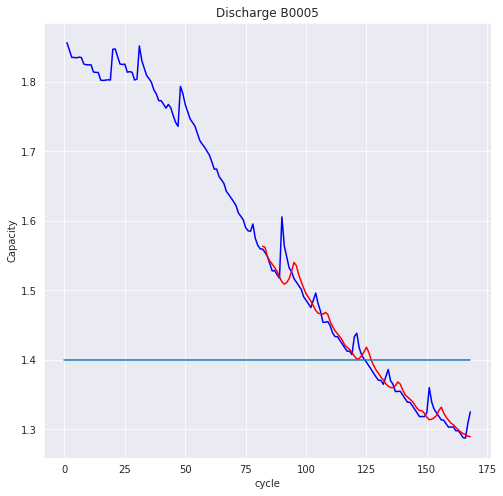

In [62]:

%matplotlib inline
import matplotlib.pyplot as plt
import seaborn as sns
plot_df = df.loc[(df['cycle']>=1),['cycle','Capacity']]
plot_per=test.loc[test['cycle']>=82,['cycle','Perdict']]
sns.set_style("darkgrid")
plt.figure(figsize=(8, 8))
plt.plot(plot_df['cycle'], plot_df['Capacity'], label="Actual data", color='blue')
plt.plot(plot_per['cycle'],plot_per['Perdict'],label="Prediction data", color='red')
#Draw threshold
plt.plot([0.,168], [1.4, 1.4])
plt.ylabel('Capacity')
# make x-axis ticks legible
adf = plt.gca().get_xaxis().get_major_formatter()
plt.xlabel('cycle')
plt.title('Discharge B0005')

In [63]:
actual=0
pred=0
Afil=0
Pfil=0
a=test['Capacity'].values
b=test['Perdict'].values
j=0
k=0
for i in range(len(a)):
    actual=a[i]
    
    if actual<1.4:
        j=i
        Afil=j
        break
for i in range(len(a)):
    pred=b[i]
    if pred< 1.4:
        k=i
        Pfil=k
        break
print("The Actual fail at cycle number: "+ str(Afil+81))
print("The prediction fail at cycle number: "+ str(Pfil+81))
    
        

The Actual fail at cycle number: 124
The prediction fail at cycle number: 126


In [64]:
RULerror=Pfil-Afil
print("The error of RUL= "+ str(RULerror)+ " Cycle(s)")

The error of RUL= 2 Cycle(s)
